In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data file contains no labels for columns, so I accessed the dataset source (https://archive.ics.uci.edu/ml/datasets/adult) for information. 

In [2]:
df = pd.read_csv('adult.data', index_col=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital-status',
                                      'occupation', 'relationship', 'race', 'sex', 'capital-gain',
                                      'capital-loss', 'hours-per-week', 'native-country', 'yearly-income'])

In [3]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# EDA

In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
yearly-income     0
dtype: int64

In [5]:
df = df.replace('\?', np.nan, regex=True)

In [6]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
yearly-income        0
dtype: int64

In [7]:
len(df)

32561

Since this isn't numeric continuous data, we'll remove these rows.

In [8]:
df = df.dropna()

In [9]:
len(df)

30162

In [10]:
df['capital-gain'].value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capital-gain, Length: 118, dtype: int64

In [11]:
df['capital-loss'].value_counts()

0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capital-loss, Length: 90, dtype: int64

In [12]:
df = df.drop(columns=['capital-gain', 'capital-loss'], axis=1)
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [13]:
df.race.value_counts()

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [14]:
len(df.loc[df.race != 'White'])

30162

In [15]:
len(df.loc[df.race != ' White'])

4229

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(" ","")
        df[column] = df[column].astype('category')

In [17]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [18]:
len(df.loc[df.race != 'White'])

4229

In [19]:
len(df.loc[df.race != ' White'])

30162

In [20]:
len(df.loc[df.sex != 'Male'])

9782

In [21]:
df.sex.value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

/tmp/ipykernel_398/395480767.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=df.loc[df.race == 'White'].sample(n=4229).append(df.loc[df.race != 'White']),


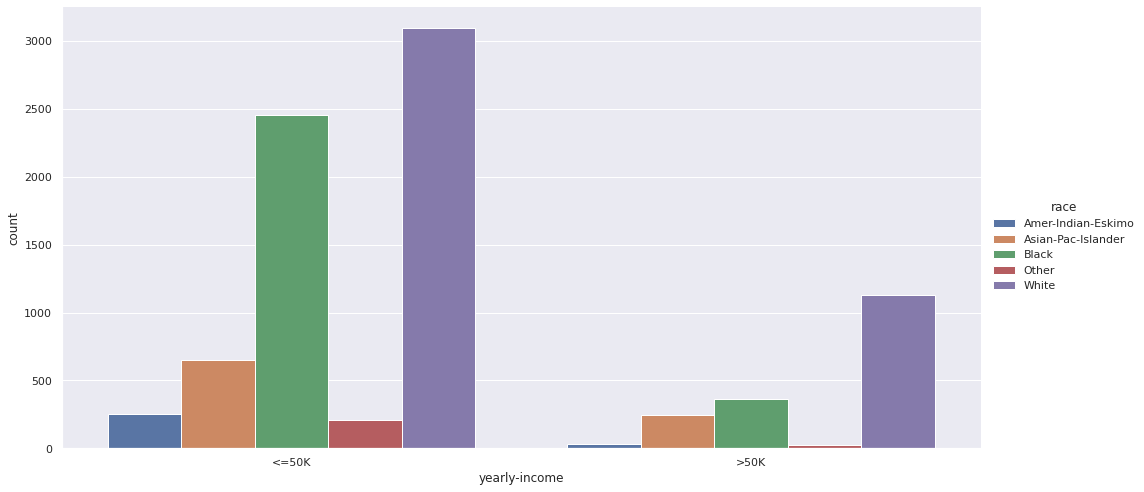

In [22]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="yearly-income", hue="race",
                data=df.loc[df.race == 'White'].sample(n=4229).append(df.loc[df.race != 'White']),
                kind="count",
                height=7, aspect=2);

/tmp/ipykernel_398/2213830296.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=df.loc[df.sex == 'Male'].sample(n=9782).append(df.loc[df.sex != 'Male']),


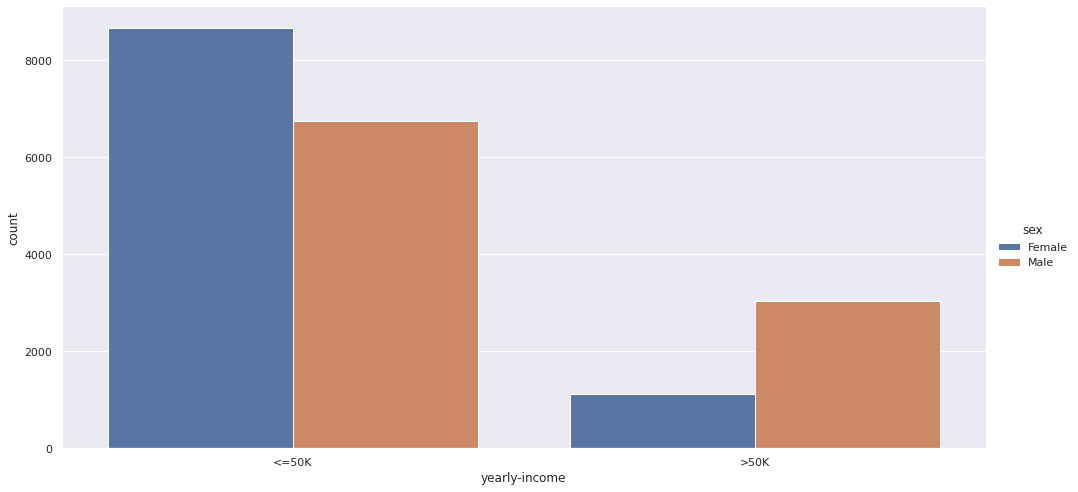

In [23]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="yearly-income", hue="sex",
                data=df.loc[df.sex == 'Male'].sample(n=9782).append(df.loc[df.sex != 'Male']),
                kind="count",
                height=7, aspect=2);

It seems women overall make less money than men, since they are the majority regarding people who make <=50k/year, but the minority when looking at the contrary. Of course, this subject could be further investigated by using other columns and methods with our data, but we won't do this now.

# Applying ML Models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, accuracy_score, roc_auc_score

In [25]:
df['yearly-income'] = df['yearly-income'].map({"<=50K": 0, ">50K": 1})

In [26]:
df['yearly-income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: yearly-income, Length: 30162, dtype: category
Categories (2, int64): [0, 1]

In [27]:
X = df.loc[:, df.columns != 'yearly-income']
y = df['yearly-income']

In [28]:
class Densifier(object):
    def fit(self, X, y=None):
        pass
    
    def fit_transform(self, X, y=None):
        return self.transform(X)
    
    def transform(self, X, y=None):
        return X.toarray()

In [29]:
def test_and_evaluate(model, X, y, train_batch_size=0.7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_batch_size, random_state=0, stratify=y)
    
    categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == 'category']
    preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])
    
    pipe = Pipeline(steps = [('preprocessor', preprocessor), ('model', model)])
    
    if type(pipe['model']).__name__ == 'GaussianNB':
        pipe = Pipeline(steps = [('preprocessor', preprocessor), ('to_dense', Densifier()), ('model', model)])

    preds = pipe.fit(X_train, y_train).predict(X_test)
    
    print('Model: ', type(pipe['model']).__name__)
    print('Train size: ', train_batch_size)
    print('Accuracy: ', accuracy_score(y_test, preds))
    print('Precision: ', precision_score(y_test, preds))
    print('Recall: ', recall_score(y_test, preds))
    print('F1 Score: ', f1_score(y_test, preds))
    if type(pipe['model']).__name__ != 'LinearSVC':
        print('ROC AUC Score: ', roc_auc_score(y, pipe.predict_proba(X)[:, 1]))
    print('\nClassification report:\n', classification_report(y_test, preds))
    
    cm = confusion_matrix(y_test, preds, labels=pipe['model'].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe['model'].classes_)

    disp.plot()
    plt.show()

In [30]:
model_list = [
    GaussianNB(),
    BernoulliNB(),
    DecisionTreeClassifier(random_state=0, max_depth=12),
    LinearSVC(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=12, random_state=0)
]

Model:  GaussianNB
Train size:  0.7
Accuracy:  0.5623825837109073
Precision:  0.35495923913043476
Recall:  0.9280639431616341
F1 Score:  0.5135135135135135
ROC AUC Score:  0.7856820298070921

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.44      0.60      6797
           1       0.35      0.93      0.51      2252

    accuracy                           0.56      9049
   macro avg       0.65      0.68      0.56      9049
weighted avg       0.80      0.56      0.58      9049



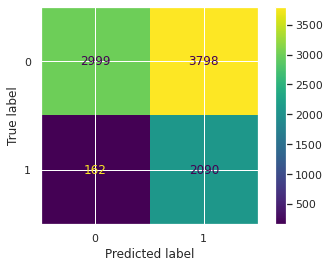

Model:  BernoulliNB
Train size:  0.7
Accuracy:  0.751132721847718
Precision:  0.5
Recall:  0.783303730017762
F1 Score:  0.6103806228373703
ROC AUC Score:  0.8566820505495119

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      6797
           1       0.50      0.78      0.61      2252

    accuracy                           0.75      9049
   macro avg       0.71      0.76      0.71      9049
weighted avg       0.81      0.75      0.77      9049



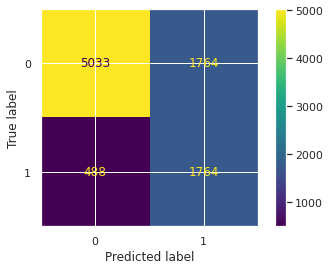

Model:  DecisionTreeClassifier
Train size:  0.7
Accuracy:  0.8238479389987844
Precision:  0.6860859728506787
Recall:  0.5386323268206039
F1 Score:  0.6034825870646766
ROC AUC Score:  0.8783778748182275

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      6797
           1       0.69      0.54      0.60      2252

    accuracy                           0.82      9049
   macro avg       0.77      0.73      0.75      9049
weighted avg       0.81      0.82      0.82      9049



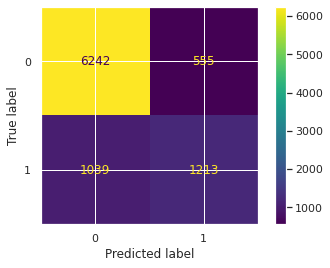

Model:  LinearSVC
Train size:  0.7
Accuracy:  0.8283788263896563
Precision:  0.7047451669595782
Recall:  0.5341918294849023
F1 Score:  0.6077292245516545

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      6797
           1       0.70      0.53      0.61      2252

    accuracy                           0.83      9049
   macro avg       0.78      0.73      0.75      9049
weighted avg       0.82      0.83      0.82      9049



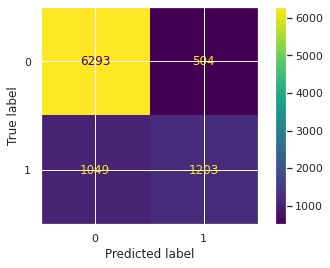

Model:  GradientBoostingClassifier
Train size:  0.7
Accuracy:  0.808487125649243
Precision:  0.6343863283272916
Recall:  0.5439609236234458
F1 Score:  0.5857040401625627
ROC AUC Score:  0.892287695573149

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      6797
           1       0.63      0.54      0.59      2252

    accuracy                           0.81      9049
   macro avg       0.75      0.72      0.73      9049
weighted avg       0.80      0.81      0.80      9049



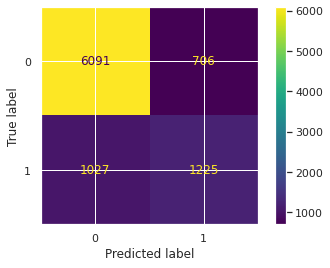

In [31]:
for model in model_list:
    test_and_evaluate(model, X, y)